In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'housing.csv'
df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms']).median()
df['median_house_value'] = df['median_house_value'] / 10000
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [6]:
cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households',
        'median_income', 'median_house_value']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   longitude           20640 non-null  int32 
 1   latitude            20640 non-null  int32 
 2   housing_median_age  20640 non-null  int32 
 3   total_rooms         20640 non-null  int32 
 4   total_bedrooms      20640 non-null  int32 
 5   population          20640 non-null  int32 
 6   households          20640 non-null  int32 
 7   median_income       20640 non-null  int32 
 8   median_house_value  20640 non-null  int32 
 9   ocean_proximity     20640 non-null  object
dtypes: int32(9), object(1)
memory usage: 887.0+ KB


In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122,37,41,880,435,322,126,8,45,NEAR BAY
1,-122,37,21,7099,435,2401,1138,8,35,NEAR BAY
2,-122,37,52,1467,435,496,177,7,35,NEAR BAY
3,-122,37,52,1274,435,558,219,5,34,NEAR BAY
4,-122,37,52,1627,435,565,259,3,34,NEAR BAY


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df['ocean_proximity'] = df['ocean_proximity'].map({
    'NEAR BAY': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    '<1H OCEAN': 4,
    'ISLAND': 5
})

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122,37,41,880,435,322,126,8,45,1
1,-122,37,21,7099,435,2401,1138,8,35,1
2,-122,37,52,1467,435,496,177,7,35,1
3,-122,37,52,1274,435,558,219,5,34,1
4,-122,37,52,1627,435,565,259,3,34,1


<AxesSubplot:>

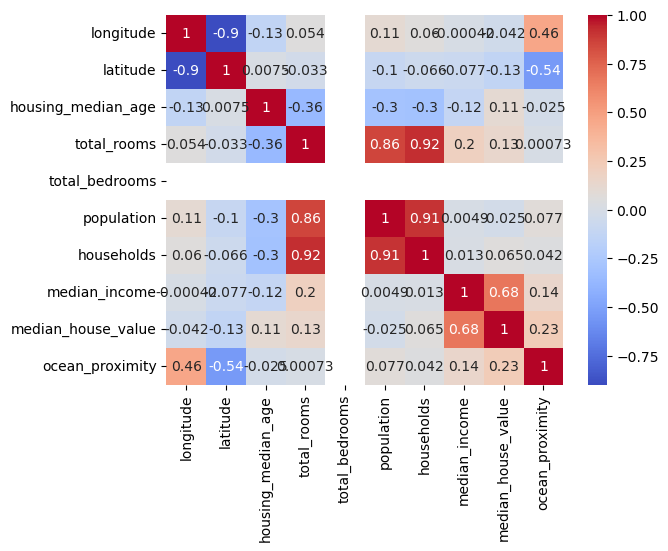

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [11]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30,
                                                    random_state = 42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 9), (6192, 9), (14448,), (6192,))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\Parth\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Parth\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [15]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y1_pred = model1.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y1_pred)
r2 = r2_score(y_test, y1_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 53.12
R-squared: 0.60


In [17]:
import pickle
pickle.dump(model1, open('SimpleLinear.pkl', 'wb'))

In [20]:
y1_pred

array([ 4.84310039, 14.23306335, 29.73675389, ..., 26.52077465,
       12.89395824, 22.90657094])

In [19]:
model = pickle.load(open('SimpleLinear.pkl', 'rb'))
y6 = model.predict(X_test)
y6

array([ 4.84310039, 14.23306335, 29.73675389, ..., 26.52077465,
       12.89395824, 22.90657094])